In [ ]:
# a.Load and explore the dataset
import numpy as np
import pandas as pd
df=pd.read_csv('/content/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.shape

(8124, 23)

<Axes: title={'center': 'Mushroom Class Distribution'}, xlabel='class', ylabel='count'>

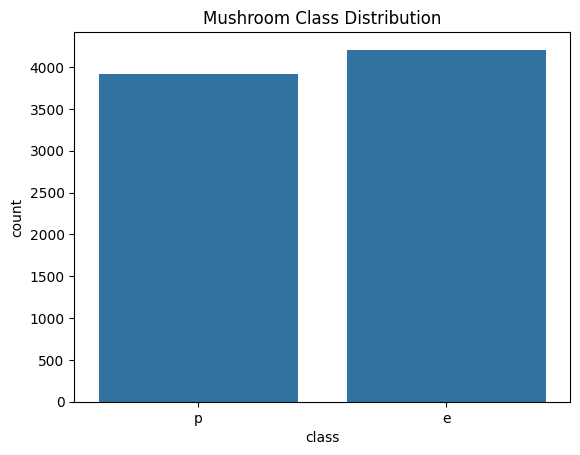

In [ ]:
# b.Visualize the data on the basis of class labels
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Mushroom Class Distribution')
sns.countplot(x='class',data=df)

In [ ]:
# c.Split the dataset using stratified sampling
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target variable
# Stratified sampling with a test size of 20% and random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# d.Apply necessary data pre processing techniques including apply any feature selection handle missing values ,remove duplicates ,normalization/standardization(if required )

df.duplicated().sum()
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
# d.Feature Selection
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Standardization is a technique used in data preprocessing to transform numerical data so that it has zero mean (average) and unit variance (spread).

# Think of it like adjusting values to a common scale, where:

# Zero mean: The average value becomes 0.
# Unit variance: The data points are spread out evenly around the mean.


# Load the dataset
df = pd.read_csv('/content/mushrooms.csv')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values (if any)
# Imputation with the most frequent value for categorical features
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Feature selection using chi-squared test for categorical features
X = df.drop('class', axis=1)
y = df['class']

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns  # If any

# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical features
        ('cat', Pipeline([('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
                         ('kbest', SelectKBest(chi2, k=10))]), categorical_features),  # Apply OneHotEncoder and SelectKBest to categorical features
    ])

# Fit and transform the data
X_scaled = preprocessor.fit_transform(X, y)
# Not applied:
# - Normalization (e.g., MinMaxScaler) is not applied as it might not be suitable for all features.
# - Handling missing values for numerical features with imputation is not applied as there are no numerical features with missing values.

In [ ]:
# e.Make predictions using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Common normalization techniques:

# Min-Max scaling: Scales features to a specific range, typically between 0 and 1.
# Z-score normalization (Standardization): Transforms features to have zero mean and unit variance.


# Assuming X_train, X_test, y_train, y_test are already defined from previous steps

# Define categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transform the test data
X_test_encoded = encoder.transform(X_test[categorical_features])


# Create and train the DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
# f.Evaluate the model using various evaluation metrics (Accuracy,Classification Report,Confusion Matrix,ROC curve)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



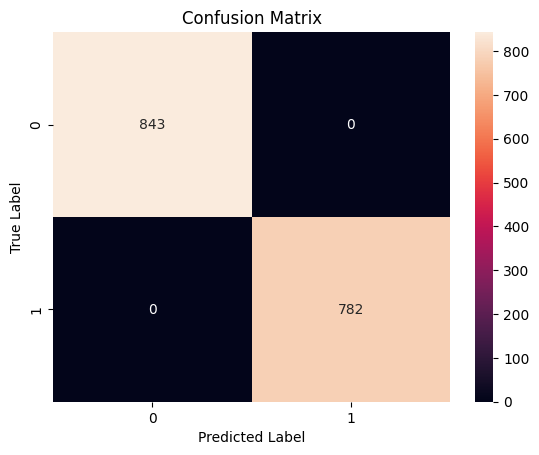

In [ ]:
#g. Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

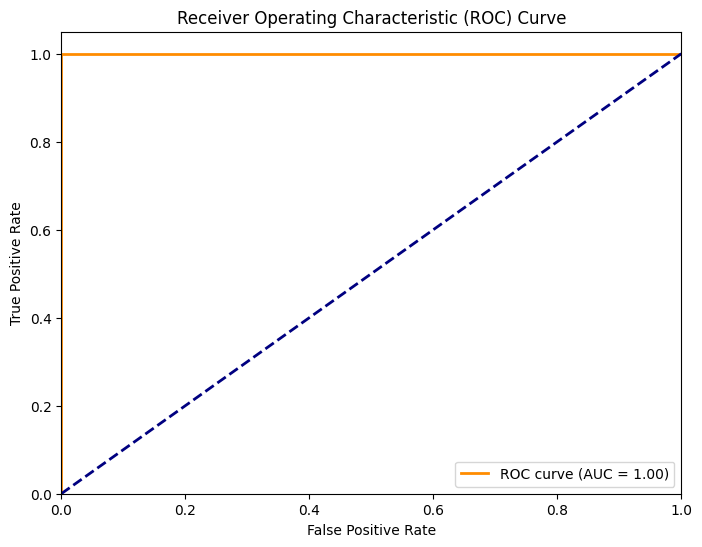

In [ ]:
  #f. ROC Curve and AUC
# The ROC curve (Receiver Operating Characteristic curve) is a graphical representation that
# llustrates the diagnostic ability of a binary classifier system as
# its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
y_prob = classifier.predict_proba(X_test_encoded)[:, 1]  # Assuming 'classifier' is your trained model
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='p')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

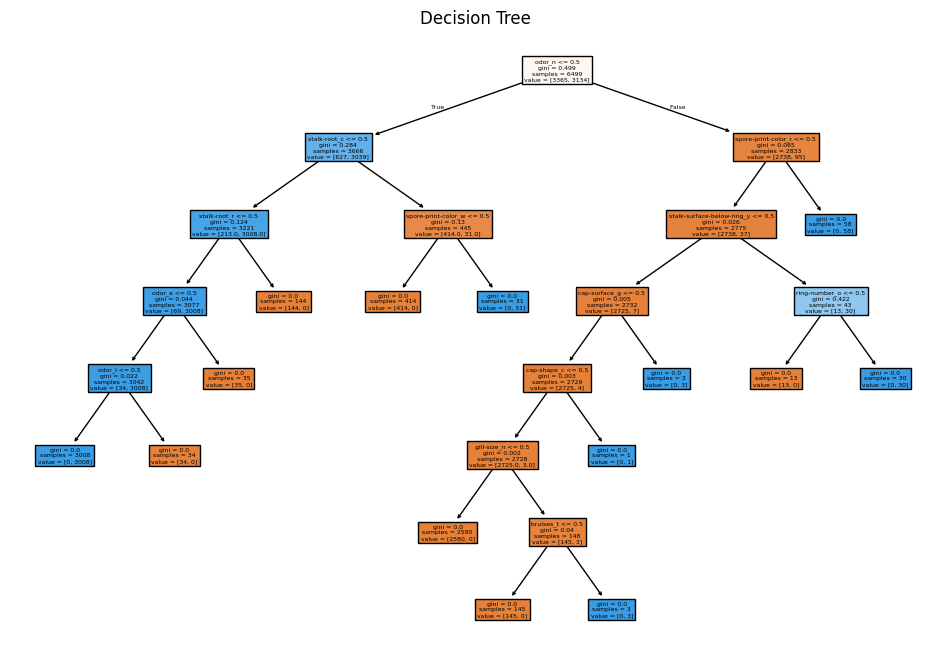

In [ ]:
# g.Viaulize the results of Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Assuming X_train_encoded, y_train are already defined from previous steps
classifier = DecisionTreeClassifier()
classifier.fit(X_train_encoded, y_train)
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(classifier, filled=True, feature_names=encoder.get_feature_names_out(categorical_features))
plt.title('Decision Tree')
plt.show()

In [ ]:
# h.save the results in .png image file
plt.savefig('decision_tree.png')

<Figure size 640x480 with 0 Axes>